In [ ]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import os
import glob

In [18]:
def plot_data(name_keywords):
    channels=['ch0','ch1']
    files=glob.glob("datas/%s*"%(name_keywords))
    for file in files:
        for channel in channels:
            datas=pd.read_csv(file,sep=' ')
            desc=datas[channel].describe()
            legend_lines = [f"{stat}: {value:.2f}" for stat, value in desc.items()]
            for i in legend_lines:
                plt.plot("",label=i)
            plt.hist(datas["ch1"], bins="auto",label=channel)
            plt.title(file)
            plt.xlabel("QDC counts")
            plt.ylabel("Counts")
            plt.xlim(46,700)
            plt.ylim(0,200)
            plt.legend()
            plt.savefig("Plots/%s_%s.png"%(file.split("/")[-1],channel))
            plt.show()

/tmp/ipykernel_8076/1119037773.py:12: RuntimeWarning: divide by zero encountered in log10
  plt.plot(X,np.log10(Y),".-",label="original plot")


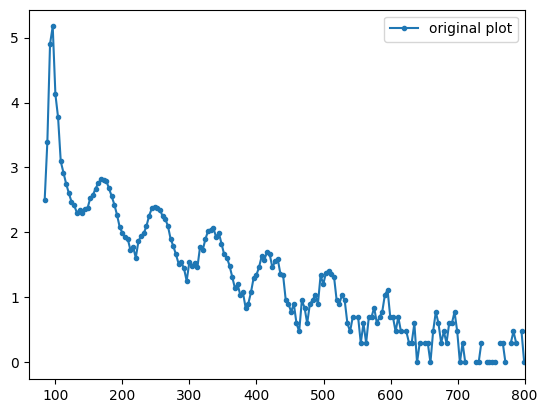

In [138]:
datas=pd.read_csv("datas/sipm1_noCoincidence.txt",sep=' ')["ch0"]
Y,X=np.histogram(datas, bins=300)
X=(X[1:]+X[:-1])/2
dydx=np.gradient(Y)
intY=sp.integrate.simpson(Y,x=X) # integrate all
y_int = sp.integrate.cumulative_trapezoid(Y, X, initial=0)
dydx_int = sp.integrate.cumulative_trapezoid(dydx, X, initial=0)
#plt.plot(X,dydx,".-",label="Derivative of the plot")
#plt.plot(X,y_int,label="integrated")
#plt.plot(X,dydx_int,label="derivative then integrate back")

plt.plot(X,np.log10(Y),".-",label="original plot")
#plt.hist(np.log10(datas), bins=300,label="Original data")
plt.xlim(60,800)
#plt.ylim(-150,150)
plt.legend()

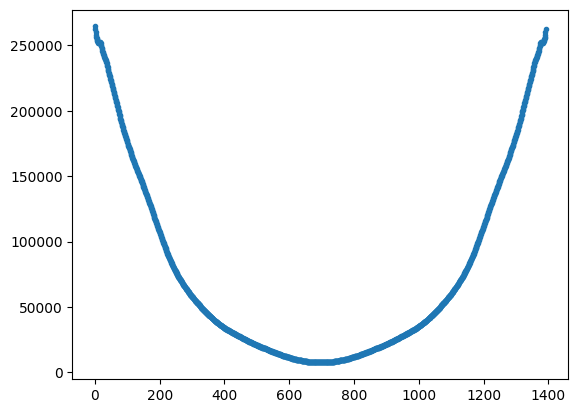

In [108]:
Y_fourier=sp.fft.fft(Y)
plt.plot(np.abs(Y_fourier),".-",label="Fourier transform")
